In [146]:
import pandas as pd
import matplotlib.pyplot as plt

state_abbr = pd.read_csv('state-abbrevs.csv')
state_area = pd.read_csv('state-areas.csv')
state_pop = pd.read_csv('state-population.csv')

pd.set_option('display.max_rows', None)

#Add Puerto Rico to state abbreviations
state_abbr.loc[len(state_abbr.index)] = ['Puerto Rico', 'PR'] 

#rename column
state_pop = state_pop.rename(columns={'state/region': 'abbreviation'})

#Remove USA rows, remove under 18 rows, and remove years that are before 2000
state_pop = state_pop.drop(state_pop[state_pop.abbreviation == 'USA'].index)
state_pop = state_pop.drop(state_pop[state_pop.ages != 'total'].index)
state_pop = state_pop.drop(state_pop[state_pop.year < 2000].index)

#Get abbreviations to insert column later
abbreviation = ((state_pop['abbreviation'].drop_duplicates()).dropna()).reset_index(drop = True)

#Get mean of state populations
state_pop = round(state_pop.groupby('abbreviation').mean(),0)

#Reset index
state_pop.reset_index(inplace = True, drop = True)

#when getting mean, index becomes abbreviation, in order to fix this, reset index and add column of abbreviations
state_pop.insert(0, 'abbreviation', abbreviation)

#Remove unnecessary column before merge
del state_pop['year']

#Merge dataframes
density_df = pd.merge(state_abbr, state_area, how='right', on='state')
density_df = pd.merge(density_df, state_pop, how='right', on='abbreviation')

#Add column for density
density_state = []

for ind in state_abbr.index:
    density_state.append(round(density_df['population'][ind]/density_df['area (sq. mi)'][ind],2))

density_df['density'] = density_state

#Sort by density
density_df.sort_values(by=['density'], axis=0,inplace=True)
density_df.reset_index(inplace = True, drop = True)
print(density_df)


                   state abbreviation  area (sq. mi)  population   density
0                 Nevada           NV         110567    661257.0      5.98
1                Montana           MT         147046    957052.0      6.51
2                 Alaska           AK         656425   4644310.0      7.08
3             Washington           WA          71303    621165.0      8.71
4                Alabama           AL          52423    680235.0     12.98
5                Wyoming           WY          97818   1830965.0     18.72
6              Tennessee           TN          42146    791658.0     18.78
7                  Texas           TX         268601   6108854.0     22.74
8                Arizona           AZ         114006   2824534.0     24.78
9               Illinois           IL          57918   1469150.0     25.37
10        South Carolina           SC          32007   1058653.0     33.08
11                Kansas           KS          82282   2786240.0     33.86
12                 Idaho 

   abbreviation   density
51           DC  12646.34
50           RI   2436.03
49           CT    635.16
48           MD    454.23
47           IN    348.19
46           DE    301.41
45           UT    278.34
44           FL    273.59
43           ND    272.35
42           PA    272.16
  abbreviation  density
0           NV     5.98
1           MT     6.51
2           AK     7.08
3           WA     8.71
4           AL    12.98
5           WY    18.72
6           TN    18.78
7           TX    22.74
8           AZ    24.78
9           IL    25.37


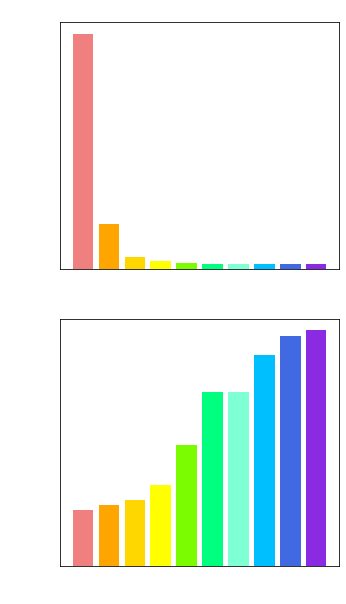

In [147]:
figure, ax = plt.subplots(2, 1)

figure.set_size_inches(5, 10)

top_ten_density = density_df[['abbreviation', 'density']][-1:-11:-1]
print(top_ten_density)

bottom_ten_density = density_df[['abbreviation', 'density']][0:10]
print(bottom_ten_density)

ax[0].bar(top_ten_density['abbreviation'],top_ten_density['density'], color=['lightcoral', 'orange', 'gold', 'yellow', 'lawngreen', 'springgreen', 'aquamarine', 'deepskyblue', 'royalblue', 'blueviolet'])
ax[0].set_title('Highest Density States', color='white')
ax[0].set_xlabel('State', color='white')
ax[0].set_ylabel('Density', color='white')

ax[1].bar(bottom_ten_density['abbreviation'],bottom_ten_density['density'], color=['lightcoral', 'orange', 'gold', 'yellow', 'lawngreen', 'springgreen', 'aquamarine', 'deepskyblue', 'royalblue', 'blueviolet'])
ax[1].set_title('Lowest Density States', color='white')
ax[1].set_xlabel('State', color='white')
ax[1].set_ylabel('Density', color='white')

for row in range(0,2):
    ax[row].tick_params(axis='x', colors='white')
    ax[row].tick_params(axis='y', colors='white')
